# Install Libraries and Frameworks

In [ ]:
!pip install torch
!pip install pytorch-ignite
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/664.8 MB 5.8 MB/s eta 0:01:20
ERROR: Operation cancelled by user
  ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(op

# Import Libraries

In [ ]:
import torch
import os
# from ignite.engine import Engine, Events
# from ignite.handlers import ModelCheckpoint
from torch import nn
from google.colab import drive
# from pytorch_lightning import Trainer, LightningModule
import csv
import json
import time
import pickle
import matplotlib.pyplot as plt

# Mount google drive to colab


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Unmount google drive

In [ ]:
drive.flush_and_unmount()

# save and load checkpoint model

## save model weights

In [ ]:
# Define a simple training engine
trainer = Engine(lambda engine, batch: None)

# Define the ModelCheckpoint handler
handler = ModelCheckpoint('/tmp/models', 'myprefix', n_saved=2, create_dir=True, require_empty=False)

# Define a simple model
model = nn.Linear(3, 3)

# Attach the handler to the trainer to save the model every 2 epochs
trainer.add_event_handler(Events.EPOCH_COMPLETED(every=2), handler, {'mymodel': model})

# Run the trainer for 6 epochs
trainer.run([0, 1, 2, 3, 4], max_epochs=6)

# Print the list of saved checkpoints
print(sorted(os.listdir('/tmp/models')))
print(handler.last_checkpoint)

## load model weights

In [ ]:
# Define your LightningModule
class MyModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.model = nn.Linear(3, 3)

# Initialize the model and trainer
model = MyModel()
trainer = Trainer()

# Resume training from a checkpoint
trainer.fit(model, ckpt_path="path/to/your/checkpoint.ckpt")

# Basic Python

## I/O Interface

### print a simple "*Hello World* "

In [ ]:
print("Hello World!")

Hello World!


### get, store and use a value

In [ ]:
name = input("Enter your name:")
print(name)

Enter your name:Amir
Amir


### print can get any symbol

In [ ]:
age = input("Enter your age:")
print(age)

Enter your age:22
22


### but in string format

In [ ]:
# input only read string format so if you want to use input
# in other format you should cast it to that foramt
# print(age + 5)
print(type(age))
age = int(age) # casting string to integer
print(age + 5)

<class 'str'>
27


### format string using f-string

In [ ]:
name = "Amir Hossein"
print(f"My name is {name}")

My name is Amir Hossein


### set precision for floating-point numbers

In [ ]:
float_num = 35.673325
print(f"set precision to 3 => {float_num:.3f}")
print(round(float_num,3))

set precision to 3 => 35.673
35.673


### Working with files

| Mode | Description |
|------|-------------|
| `"r"` | Read mode (default). Opens a file for reading. Raises an error if the file does not exist. |
| `"w"` | Write mode. Opens a file for writing. Overwrites the file if it exists or creates a new file if it doesn't. |
| `"a"` | Append mode. Opens a file for appending. Adds data to the end of the file without overwriting it. Creates a new file if it doesn't exist. |
| `"b"` | Binary mode. Opens a file in binary format (e.g., `"rb"` for reading binary data or `"wb"` for writing binary data). |
| `"+"` | Read and write mode. Opens a file for both reading and writing (e.g., `"r+"` or `"w+"`). |

#### read, write and appending for .txt files

In [ ]:
# Open a file in read mode
with open("example.txt", "r") as file:
    content = file.read()  # Reads the entire file
    print("File Content:\n", content)

File Content:
 Hello, World!
This is a sample file.


In [ ]:
# Open a file in write mode
with open("example.txt", "w") as file:
    file.write("Hello, World!\n")
    file.write("This is a sample file.")

In [ ]:
# Open a file in append mode
with open("example.txt", "a") as file:
    file.write("\nThis line is appended.")

#### Working with csv file

In [ ]:
# Reading a CSV file
with open("data.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)  # Each row is a list of strings

['Name', 'Age', 'City']
['Alice', '30', 'New York']
['Bob', '25', 'Los Angeles']


In [ ]:
# Writing to a CSV file
data = [
    ["Name", "Age", "City"],
    ["Alice", 30, "New York"],
    ["Bob", 25, "Los Angeles"]
]

with open("data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

#### working with json

In [ ]:
# Reading a JSON file
with open("data.json", "r") as file:
    data = json.load(file)  # Loads JSON data as a Python dictionary
    print("JSON Data:", data)

JSON Data: {'name': 'Alice', 'age': 30, 'city': 'New York'}


In [ ]:
# Writing to a JSON file
data = {
    "name": "Alice",
    "age": 30,
    "city": "New York"
}

with open("data.json", "w") as file:
    json.dump(data, file, indent=4)  # Writes JSON data with indentation

## Variable and data structure

### Type of variables in python
*   Integer => int
*   Floating-point => float
*   Complex => complex
*   String => str
*   Boolean(True or False) => bool
*   None Type => None

In [ ]:
# Integer (int)
age = 25
print("Age:", age, type(age))  # Output: Age: 25 <class 'int'>

# Floating-point (float)
height = 5.9
print("Height:", height, type(height))  # Output: Height: 5.9 <class 'float'>

# Complex (complex)
complex_number = 3 + 4j
print("Complex Number:", complex_number, type(complex_number))  # Output: Complex Number: (3+4j) <class 'complex'>

# String (str)
name = "Alice"
print("Name:", name, type(name))  # Output: Name: Alice <class 'str'>

# Boolean (bool)
is_student = True
print("Is Student:", is_student, type(is_student))  # Output: Is Student: True <class 'bool'>

# None Type (None)
result = None
print("Result:", result, type(result))  # Output: Result: None <class 'NoneType'>

Age: 25 <class 'int'>
Height: 5.9 <class 'float'>
Complex Number: (3+4j) <class 'complex'>
Name: Alice <class 'str'>
Is Student: True <class 'bool'>
Result: None <class 'NoneType'>


### Type of data structures


*   Array => list
*   Tuple => tuple
*   Dictionary => dict
*   Set => set (frozenset)
*   range



#### List

In [ ]:
# List
fruits = ["apple", "banana", "cherry"]
print("List:", fruits, type(fruits))  # Output: List: ['apple', 'banana', 'cherry'] <class 'list'>

# Modifying a list
fruits.append("orange")
print("Updated List:", fruits)  # Output: Updated List: ['apple', 'banana', 'cherry', 'orange']

List: ['apple', 'banana', 'cherry'] <class 'list'>
Updated List: ['apple', 'banana', 'cherry', 'orange']


#### Methods for List

In [ ]:
l = list()
# Create a list
my_list = [1, 2, 3, 4]
print(my_list)
# Add an item
my_list.append(5)  # [1, 2, 3, 4, 5]
print(f"Add an item {my_list}")
# Insert an item at a specific index
my_list.insert(2, 10)  # [1, 2, 10, 3, 4, 5]
print(f"Insert an item at a specific index {my_list}")
# Remove an item by value
my_list.remove(10)  # [1, 2, 3, 4, 5]
print(f"Remove an item by value {my_list}")
# Remove an item by index
popped_item = my_list.pop(1)  # [1, 3, 4, 5], popped_item = 2
print(f"Remove an item by index {my_list}")
# Find the index of an item
index = my_list.index(3)  # index = 1
print(f"Find the index of an item {my_list}")
# Count occurrences of an item
count = my_list.count(4)  # count = 1
print(f"Count occurrences of an item {my_list}")
# Sort the list
my_list.sort()  # [1, 3, 4, 5]
print(f"Sort the list {my_list}")
# Reverse the list
my_list.reverse()  # [5, 4, 3, 1]
print(f"Reverse the list {my_list}")
# Clear the list
my_list.clear()  # []
print(f"Clear the list {my_list}")

[1, 2, 3, 4]
Add an item [1, 2, 3, 4, 5]
Insert an item at a specific index [1, 2, 10, 3, 4, 5]
Remove an item by value [1, 2, 3, 4, 5]
Remove an item by index [1, 3, 4, 5]
Find the index of an item [1, 3, 4, 5]
Count occurrences of an item [1, 3, 4, 5]
Sort the list [1, 3, 4, 5]
Reverse the list [5, 4, 3, 1]
Clear the list []


#### Tuple

In [ ]:
# Tuple
colors = ("red", "green", "blue")
print("Tuple:", colors, type(colors))  # Output: Tuple: ('red', 'green', 'blue') <class 'tuple'>

# Accessing elements
print("First Color:", colors[0])  # Output: First Color: red

Tuple: ('red', 'green', 'blue') <class 'tuple'>
First Color: red


#### Methods for Tuple

In [ ]:
# Create a tuple
my_tuple = (1, 2, 3, 4)
print(my_tuple)
# Access an item
item = my_tuple[2]  # item = 3
print(f"Access an item {my_tuple}")
# Find the index of an item
index = my_tuple.index(3)  # index = 2
print(f"Find the index of an item {my_tuple}")
# Count occurrences of an item
count = my_tuple.count(4)  # count = 1
print(f"Count occurrences of an item {my_tuple}")
# Concatenate tuples
new_tuple = my_tuple + (5, 6)  # (1, 2, 3, 4, 5, 6)
print(f"Concatenate tuples {my_tuple}")

(1, 2, 3, 4)
Access an item (1, 2, 3, 4)
Find the index of an item (1, 2, 3, 4)
Count occurrences of an item (1, 2, 3, 4)
Concatenate tuples (1, 2, 3, 4)


#### Dictionary

In [ ]:
# Dictionary
person = {"name": "Alice", "age": 30, "city": "New York"}
print("Dictionary:", person, type(person))  # Output: Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York'} <class 'dict'>

# Accessing values
print("Name:", person["name"])  # Output: Name: Alice

# Adding a new key-value pair
person["email"] = "alice@example.com"
print("Updated Dictionary:", person)  # Output: Updated Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York', 'email': 'alice@example.com'}

Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York'} <class 'dict'>
Name: Alice
Updated Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York', 'email': 'alice@example.com'}


#### Methods for Dictionary

In [ ]:
# Create a dictionary
my_dict = {"name": "Alice", "age": 25}
print(my_dict)
# Add or update a key-value pair
my_dict["city"] = "New York"  # {"name": "Alice", "age": 25, "city": "New York"}
print(f"Add or update a key-value pair {my_dict}")
# Remove a key-value pair
del my_dict["age"]  # {"name": "Alice", "city": "New York"}
print(f"Remove a key-value pair {my_dict}")
# Get a value by key
name = my_dict["name"]  # name = "Alice"
print(f"Get a value by key {my_dict}")
# Check if a key exists
has_age = "age" in my_dict  # has_age = False
print(f"Check if a key exists {my_dict}")
# Get all keys
keys = my_dict.keys()  # dict_keys(['name', 'city'])
print(f"Get all keys {my_dict}")
# Get all values
values = my_dict.values()  # dict_values(['Alice', 'New York'])
print(f"Get all values {my_dict}")
# Get all key-value pairs
items = my_dict.items()  # dict_items([('name', 'Alice'), ('city', 'New York')])
print(f"Get all key-value pairs {my_dict}")
# Clear the dictionary
my_dict.clear()  # {}
print(f"Clear the dictionary {my_dict}")

{'name': 'Alice', 'age': 25}
Add or update a key-value pair {'name': 'Alice', 'age': 25, 'city': 'New York'}
Remove a key-value pair {'name': 'Alice', 'city': 'New York'}
Get a value by key {'name': 'Alice', 'city': 'New York'}
Check if a key exists {'name': 'Alice', 'city': 'New York'}
Get all keys {'name': 'Alice', 'city': 'New York'}
Get all values {'name': 'Alice', 'city': 'New York'}
Get all key-value pairs {'name': 'Alice', 'city': 'New York'}
Clear the dictionary {}


#### Set

In [ ]:
# Set
unique_numbers = {1, 2, 3, 4, 3, 2}
print("Set:", unique_numbers, type(unique_numbers))  # Output: Set: {1, 2, 3, 4} <class 'set'>

# Adding an element
unique_numbers.add(5)
print("Updated Set:", unique_numbers)  # Output: Updated Set: {1, 2, 3, 4, 5}

Set: {1, 2, 3, 4} <class 'set'>
Updated Set: {1, 2, 3, 4, 5}


#### Methods for Set

In [ ]:
# Create a set
my_set = {1, 2, 3, 4}
print(my_set)
# Add an item
my_set.add(5)  # {1, 2, 3, 4, 5}
print(f"Add an item {my_set}")
# Remove an item
my_set.remove(3)  # {1, 2, 4, 5}
print(f"Remove an item {my_set}")
# Discard an item (no error if item doesn't exist)
my_set.discard(10)  # {1, 2, 4, 5}
print(f"Discard an item {my_set}")
# Pop a random item
popped_item = my_set.pop()  # popped_item = 1, {2, 4, 5}
print(f"Pop a random item {my_set}")
# Check if an item exists
has_2 = 2 in my_set  # has_2 = True
print(f"Check if an item exists {has_2}")
# Union of two sets
union = my_set.union({5, 6, 7})  # {2, 4, 5, 6, 7}
print(f"Union of two sets {union}")
# Intersection of two sets
intersection = my_set.intersection({4, 5, 6})  # {4, 5}
print(f"Union of two sets {intersection}")
# Difference of two sets
difference = my_set.difference({5, 6})  # {2, 4}
print(f"Difference of two set {difference}")
# Clear the set
my_set.clear()  # set()

{1, 2, 3, 4}
Add an item {1, 2, 3, 4, 5}
Remove an item {1, 2, 4, 5}
Discard an item {1, 2, 4, 5}
Pop a random item {2, 4, 5}
Check if an item exists True
Union of two sets {2, 4, 5, 6, 7}
Union of two sets {4, 5}
Difference of two set {2, 4}


#### Frozenset

In [ ]:
# Frozenset
frozen_numbers = frozenset({1, 2, 3, 4})
print("Frozenset:", frozen_numbers, type(frozen_numbers))  # Output: Frozenset: frozenset({1, 2, 3, 4}) <class 'frozenset'>

Frozenset: frozenset({1, 2, 3, 4}) <class 'frozenset'>


#### range

In [ ]:
# Range
numbers = range(1, 6, 2)  # Generates numbers from 1 to 5
print("Range:", numbers, type(numbers))  # Output: Range: range(1, 6) <class 'range'>

# Converting range to a list
print("Range as List:", list(numbers))  # Output: Range as List: [1, 2, 3, 4, 5]

Range: range(1, 6, 2) <class 'range'>
Range as List: [1, 3, 5]


#### summary

| Data Structure | Ordered | Mutable | Duplicates Allowed | Example Use Case |
|----------------|---------|---------|---------------------|------------------|
| **List**       | Yes     | Yes     | Yes                 | Storing a collection of items that may change. |
| **Tuple**      | Yes     | No      | Yes                 | Storing a collection of items that should not change. |
| **Dictionary** | No      | Yes     | Keys: No, Values: Yes | Storing key-value pairs (e.g., user data). |
| **Set**        | No      | Yes     | No                  | Removing duplicates or performing set operations. |
| **Frozenset**  | No      | No      | No                  | Immutable set for fixed collections. |
| **Range**      | Yes     | No      | N/A                 | Iterating over a sequence of numbers. |

#### summary table of methods

| **Data Structure** | **Methods**                                                                 | **Description**                                                                 |
|--------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **List**           | `append(item)`, `insert(index, item)`, `remove(item)`, `pop(index)`         | Add, insert, remove, or pop items.                                              |
|                    | `index(item)`, `count(item)`, `sort()`, `reverse()`, `clear()`              | Find index, count occurrences, sort, reverse, or clear the list.                |
| **Tuple**          | `index(item)`, `count(item)`                                                | Find index or count occurrences of an item.                                     |
|                    | Concatenation (`+`)                                                         | Combine two tuples.                                                             |
| **Dictionary**     | `dict[key] = value`, `del dict[key]`, `dict.get(key)`, `dict.keys()`        | Add, remove, or access key-value pairs. Get keys, values, or items.             |
|                    | `dict.values()`, `dict.items()`, `dict.clear()`                             | Get values, key-value pairs, or clear the dictionary.                           |
| **Set**            | `add(item)`, `remove(item)`, `discard(item)`, `pop()`, `clear()`            | Add, remove, discard, pop, or clear items.                                      |
|                    | `union(set)`, `intersection(set)`, `difference(set)`                        | Perform set operations like union, intersection, or difference.                 |

## Operators

| Category          | Operator | Description                          | Example                     |
|-------------------|----------|--------------------------------------|-----------------------------|
| **Arithmetic**    | `+`      | Addition                             | `3 + 2 = 5`                 |
|                   | `-`      | Subtraction                          | `3 - 2 = 1`                 |
|                   | `*`      | Multiplication                       | `3 * 2 = 6`                 |
|                   | `/`      | Division                             | `3 / 2 = 1.5`               |
|                   | `%`      | Modulus (remainder)                  | `3 % 2 = 1`                 |
|                   | `**`     | Exponentiation                       | `3 ** 2 = 9`                |
|                   | `//`     | Floor division                       | `3 // 2 = 1`                |
| **Comparison**    | `==`     | Equal to                             | `3 == 2 → False`            |
|                   | `!=`     | Not equal to                         | `3 != 2 → True`             |
|                   | `>`      | Greater than                         | `3 > 2 → True`              |
|                   | `<`      | Less than                            | `3 < 2 → False`             |
|                   | `>=`     | Greater than or equal to             | `3 >= 2 → True`             |
|                   | `<=`     | Less than or equal to                | `3 <= 2 → False`            |
| **Logical**       | `and`    | True if both conditions are true     | `(3 > 2) and (5 < 10) → True`|
|                   | `or`     | True if at least one condition is true | `(3 > 2) or (5 > 10) → True`|
|                   | `not`    | Reverses the result                  | `not (3 > 2) → False`       |
| **Assignment**    | `=`      | Assign                               | `x = 5`                     |
|                   | `+=`     | Add and assign                       | `x += 3 → x = x + 3`        |
|                   | `-=`     | Subtract and assign                  | `x -= 3 → x = x - 3`        |
|                   | `*=`     | Multiply and assign                  | `x *= 3 → x = x * 3`        |
|                   | `/=`     | Divide and assign                    | `x /= 3 → x = x / 3`        |
|                   | `%=`     | Modulus and assign                   | `x %= 3 → x = x % 3`        |
|                   | `**=`    | Exponent and assign                  | `x **= 3 → x = x ** 3`      |
|                   | `//=`    | Floor divide and assign              | `x //= 3 → x = x // 3`      |
| **Membership**    | `in`     | True if value is found               | `"a" in "apple" → True`     |
|                   | `not in` | True if value is not found           | `"b" not in "apple" → True` |
| **Identity**      | `is`     | True if both objects are the same    | `x is y`                    |
|                   | `is not` | True if both objects are not the same | `x is not y`              |

### Arithmetic

In [ ]:
a = 10
b = 3

print("Addition:", a + b)          # Output: 13
print("Subtraction:", a - b)       # Output: 7
print("Multiplication:", a * b)   # Output: 30
print("Division:", a / b)          # Output: 3.333...
print("Modulus:", a % b)           # Output: 1
print("Exponentiation:", a ** b)  # Output: 1000
print("Floor Division:", a // b)  # Output: 3

Addition: 13
Subtraction: 7
Multiplication: 30
Division: 3.3333333333333335
Modulus: 1
Exponentiation: 1000
Floor Division: 3


### Comparison

In [ ]:
x = 5
y = 10

print("Equal to:", x == y)          # Output: False
print("Not equal to:", x != y)      # Output: True
print("Greater than:", x > y)       # Output: False
print("Less than:", x < y)          # Output: True
print("Greater than or equal to:", x >= y)  # Output: False
print("Less than or equal to:", x <= y)      # Output: True

Equal to: False
Not equal to: True
Greater than: False
Less than: True
Greater than or equal to: False
Less than or equal to: True


### Logical

In [ ]:
a = True
b = False

print("AND:", a and b)  # Output: False
print("OR:", a or b)    # Output: True
print("NOT:", not a)    # Output: False

AND: False
OR: True
NOT: False


### Assignment

In [ ]:
x = 10
x += 5  # Equivalent to x = x + 5
print("x += 5:", x)  # Output: 15

### Membership

In [ ]:
fruits = ["apple", "banana", "cherry"]
print("banana in fruits:", "banana" in fruits)        # Output: True
print("mango not in fruits:", "mango" not in fruits)  # Output: True

banana in fruits: True
mango not in fruits: True


### Identity

In [ ]:
x = 5
y = 5
z = [1, 2, 3]

print("x is y:", x is y)          # Output: True (same value, same memory location for small integers)
print("x is not z:", x is not z)  # Output: True

x is y: True
x is not z: True


| **Aspect**       | **`==`**                          | **`is`**                          |
|-------------------|-----------------------------------|-----------------------------------|
| **Purpose**       | Compares **values** of objects.   | Compares **memory locations** of objects. |
| **Returns `True`**| If values are equal.             | If both objects are the same (same memory location). |
| **Use Case**      | Checking if two objects have the same content. | Checking if two variables reference the same object. |

In [ ]:
li1 = [1,2,3]
li2 = [1,2,3]
print(li1 == li2)

True


In [ ]:
print(li1 is li2)

False



#### Special Case
```markdown
# Small integers and strings
a = 5
b = 5
print(a is b)  # Output: True (small integers are reused)

c = "hello"
d = "hello"
print(c is d)  # Output: True (short strings are reused)

e = [1, 2, 3]
f = [1, 2, 3]
print(e is f)  # Output: False (lists are not reused)


## Control Statment

### if, elif and else

In [ ]:
age = 18
if age < 18:
    print("You are a minor.")
elif age == 18:
    print("You just became an adult!")
else:
    print("You are an adult.")

You just became an adult!


### for loop

In [ ]:
fruits = ["apple", "banana", "cherry"]
for fruit in fruits:
    print(fruit)
for i in range(10):
  print(i)

apple
banana
cherry
0
1
2
3
4
5
6
7
8
9


### while loop

In [ ]:
age = 8
while age < 18:
  print("young")
  age += 1
print("adult")

young
young
young
young
young
young
young
young
young
young
adult


### difference between while and for


---

#### **When to Use Which Loop**
- Use a **`for` loop** when:
  - You know the number of iterations in advance.
  - You want to iterate over a collection (e.g., list, string, dictionary).
  - Example: Printing all elements in a list.

- Use a **`while` loop** when:
  - You don't know the number of iterations in advance.
  - You need to repeat until a condition is met.
  - Example: Asking for user input until a valid response is given.

---


### control flow statment

#### break

In [ ]:
for i in range(10):
    if i == 5:
        break
    print(i)  # Output: 0 1 2 3 4

#### continue

In [ ]:
for i in range(5):
    if i == 2:
        continue
    print(i)  # Output: 0 1 3 4

#### pass

In [ ]:
for i in range(3):
    if i == 1:
        pass  # Placeholder
    print(i)  # Output: 0 1 2

### summary

| **Control Statement** | **Description**                                                                 | **Example**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Conditional**       |                                                                                 |                                                                             |
| `if`                  | Executes code if a condition is `True`.                                         | `if x > 10: print("x is greater than 10")`                                  |
| `elif`                | Executes code if the previous condition is `False` and this condition is `True`.| `elif x == 10: print("x is 10")`                                            |
| `else`                | Executes code if all previous conditions are `False`.                           | `else: print("x is less than 10")`                                          |
| **Looping**           |                                                                                 |                                                                             |
| `for`                 | Iterates over a sequence (e.g., list, string, range).                          | `for i in range(3): print(i)`                                               |
| `while`               | Repeats code as long as a condition is `True`.                                  | `while x < 5: print(x); x += 1`                                             |
| **Control Flow**      |                                                                                 |                                                                             |
| `break`               | Exits the loop immediately.                                                     | `for i in range(10): if i == 5: break`                                      |
| `continue`            | Skips the current iteration and moves to the next one.                          | `for i in range(5): if i == 2: continue`                                    |
| `pass`                | A placeholder that does nothing.                                                | `for i in range(3): if i == 1: pass`                                        |

## Functions


 Syntax of a Function
```
  def function_name(parameters):
      """Docstring (optional)"""
      # Function body
      return value  # Optional
```


- def: Keyword to define a function.

- function_name: Name of the function (follows Python naming conventions).

- parameters: Inputs to the function (optional).

- Docstring: A description of the function (optional but recommended).

- return: Returns a value (optional). If omitted, the function returns None.

####  Built-in Functions
Python provides many built-in functions like print(), len(), type(), etc.

In [ ]:
sample_list = [1,2,3]
print(len(sample_list))  # Built-in function

3


#### User-Defined Functions
Functions defined by the user.

In [ ]:
def greet(name):
    """This function greets the user."""
    print(f"Hello, {name}!")

greet("Alice")  # Output: Hello, Alice!

Hello, Alice!


#### Lambda Functions (Anonymous Functions)
Small, single-expression functions defined using the lambda keyword
```
lambda arguments: expression
```

In [ ]:
square = lambda x: x ** 2
print(square(5))  # Output: 25

25


#### Positional Arguments
Arguments passed in the correct positional orde

In [ ]:
def add_func(a, b):
    return a + b

print(add_func(2, 3))  # Output: 5

5


#### Keyword Arguments and
#### Default Arguments
Parameters with default values \
Arguments passed with a keyword (parameter name)

In [ ]:
def greet_func(name, message = "Hi"):
    print(f"{message}, {name}!")

greet_func(name="Alice")  # Output: Hello, Alice!

Hi, Alice!


#### Variable-Length Arguments
- *args: Accepts any number of positional arguments as a tuple.

- **kwargs: Accepts any number of keyword arguments as a dictionary

In [ ]:
def print_args(*a, **kwargs):
    print("Positional arguments:", a)
    print("Keyword arguments:", kwargs)

print_args(1, 2, 3, name="Alice", age=25)
# Output:
# Positional arguments: (1, 2, 3)
# Keyword arguments: {'name': 'Alice', 'age': 25}

Positional arguments: (1, 2, 3)
Keyword arguments: {'name': 'Alice', 'age': 25}


#### Return Values
A function can return a value using the return statement. If no return is specified, the function returns None

In [ ]:
def add(a, b):
    return a + b

result = add(2, 3)
print(result)  # Output: 5

5


#### Scope of Variables
- Local Scope: Variables defined inside a function
- Global Scope: Variables defined outside a function

In [ ]:
x = 10  # Global variable

def my_function():
    y = 5  # Local variable
    print("Local variable y:", y)
    print("Global variable x:", x)

my_function()
# Output:
# Local variable y: 5
# Global variable x: 10

Local variable y: 5
Global variable x: 10


#### decorator
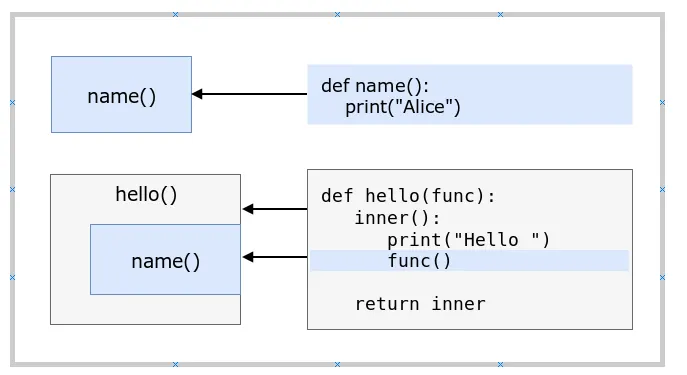

In [ ]:
def do_something1(func):
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print(f"timestamps: {end - start}")
    return wrapper

@do_something1
def func():
    time.sleep(5)
    print("Hello")

func()

Hello
timestamps: 5.000166177749634


#### manual decorator

In [ ]:
def do_something2(func):
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print(f"timestamps: {end - start}")
    return wrapper

def random_function():
    time.sleep(5)
    print("Hello")

random_function = do_something2(random_function)

random_function()

Hello
timestamps: 5.000248432159424


### summary

| **Concept**               | **Description**                                                                 | **Example**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Function Definition**   | Define a function using `def`.                                                  | `def greet(name): print(f"Hello, {name}!")`                                 |
| **Lambda Function**       | Single-expression anonymous function.                                           | `square = lambda x: x ** 2`                                                |
| **Positional Arguments**  | Arguments passed in order.                                                      | `add(2, 3)`                                                                |
| **Keyword Arguments**     | Arguments passed with parameter names.                                          | `greet(name="Alice", message="Hello")`                                     |
| **Default Arguments**     | Parameters with default values.                                                 | `greet(name="Alice")`                                                      |
| **Variable-Length Args**  | Accept any number of arguments (`*args`, `**kwargs`).                          | `print_args(1, 2, 3, name="Alice")`                                        |
| **Return Value**          | Return a value using `return`.                                                  | `return a + b`                                                             |
| **Scope**                 | Local vs global variables.                                                      | `x = 10` (global), `y = 5` (local)                                         |
| **Recursion**             | Function calls itself.                                                          | `factorial(n)`                                                             |
| **Decorators**            | Modify behavior of functions.                                                   | `@decorator`                                                               |
| **Generators**            | Produce values lazily using `yield`.                                            | `yield i`                                                                  |

## debugging a training loop

In [ ]:
# Simulate a training loop
for epoch in range(1, 11):
    loss = 1.0 / epoch  # Simulated loss

    # Save a checkpoint every 2 epochs
    if epoch % 2 == 0:
        checkpoint = {"epoch": epoch, "loss": loss}
        with open("checkpoint.pkl", "wb") as f:
            pickle.dump(checkpoint, f)
        print(f"Checkpoint saved at epoch {epoch}")

    # Simulate an error at epoch 5
    if epoch == 5:
        print("Simulating an error...")
        break  # Stop execution

# Debugging: Load the last checkpoint
with open("checkpoint.pkl", "rb") as f:
    checkpoint = pickle.load(f)

print(f"Resuming from epoch {checkpoint['epoch']} with loss {checkpoint['loss']}")

## OOP

## Numpy

In [ ]:
import numpy as np

array

powerfull functions of numpy

relation between pytorch and numpy

from continuous to discrete

## Seaborn and Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

# Crate a new environment
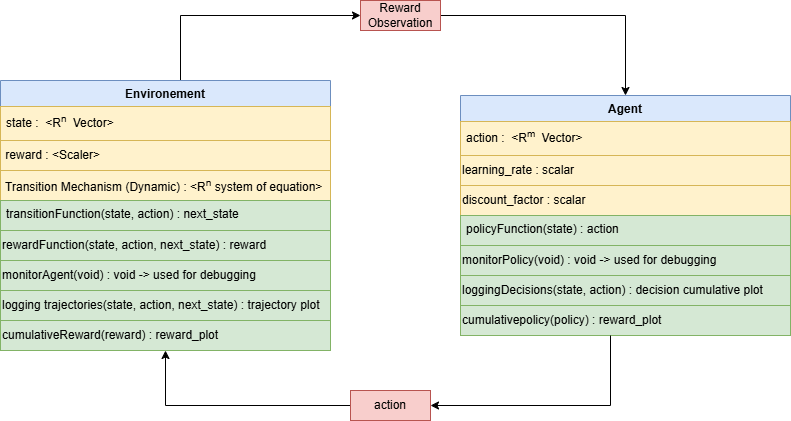

## Environment Class
### properties
  - State
  - Reward
  - Transition Mechanism (Dynamic)

### Methods
  - Transition Function
  - Reward Function
  - Monitor agent behavior
  - logging trajectories
  - plot cumulative Reward

## Agent Class
### properties
  - Action
  - Learning Rate
  - Discount factor

### Methods
  - Policy Function
  - Monitor policy  
  - logging agent decisions
  - plot cumulative policy

# Pytorch

## math

In [ ]:
import sympy as sym
import numpy as np

define a symbolic variable

In [ ]:
# x defined as symbolic variable
x = sym.symbols('x')

define a symbolic function

In [ ]:
# define a symbolic function
fx = 3*(x**2) + 2*x + 1

In [ ]:
fx

3*x**2 + 2*x + 1

substitute value in function ```f(x)```

In [ ]:
fx.subs(x,2)

17

first derivative of ```f(x)```

In [ ]:
dfx = sym.diff(fx,x)

In [ ]:
dfx

6*x + 2

second derivative of ```f(x)```

In [ ]:
d2fx = sym.diff(dfx,x)

In [ ]:
d2fx

6

Gradient descent

In [ ]:
from tqdm import tqdm
i = 0
error = 50_000
xa = 20
alpha = 0.05
while True:
  xa = xa - alpha*dfx.subs(x,xa)
  error = dfx.subs(x,xa)
  print(f"error (step{i}):{error}")
  if abs(error) < 0.01:
    break
  i += 1
print("-"*20)
print(f"value of f(xa) : {fx.subs(x,xa)}")

error (step0):85.4000000000000
error (step1):59.7800000000000
error (step2):41.8460000000000
error (step3):29.2922000000000
error (step4):20.5045400000000
error (step5):14.3531780000000
error (step6):10.0472246000000
error (step7):7.03305722000000
error (step8):4.92314005400000
error (step9):3.44619803780000
error (step10):2.41233862646000
error (step11):1.68863703852200
error (step12):1.18204592696540
error (step13):0.827432148875780
error (step14):0.579202504213046
error (step15):0.405441752949132
error (step16):0.283809227064393
error (step17):0.198666458945075
error (step18):0.139066521261552
error (step19):0.0973465648830865
error (step20):0.0681425954181605
error (step21):0.0476998167927125
error (step22):0.0333898717548988
error (step23):0.0233729102284292
error (step24):0.0163610371599003
error (step25):0.0114527260119304
error (step26):0.00801690820835121
--------------------
value of f(xa) : 0.666672022568102


multivariate function and partial derivatives

In [ ]:
y = sym.symbols('y')
z = sym.symbols('z')
fzy = (y)*z**2 - z*y**2 + 2*y*z
dzfzy = sym.diff(fzy,z)
dyfzy = sym.diff(fzy,y)
dzyfzy = sym.diff(fzy,z,y)
fzy

-y**2*z + y*z**2 + 2*y*z

In [ ]:
dzfzy

-y**2 + 2*y*z + 2*y

In [ ]:
dyfzy

-2*y*z + z**2 + 2*z

In [ ]:
dzyfzy

2*(-y + z + 1)

substitute in values in multivariate function

In [ ]:
fzy.evalf(subs={y: 20,z : 20})

800.000000000000

In [ ]:
v = sym.lambdify((y,z),fzy,'numpy')
dvz = sym.lambdify((y,z),dzfzy,'numpy')
dvy = sym.lambdify((y,z),dyfzy,'numpy')
dvzy = sym.lambdify((y,z),dzyfzy,'numpy')
dvy(1,1)

1

2-D Gradient Descent

In [ ]:
i = 0
error = 50_000
ya, za = [1,1]
alpha = 0.05
while abs(error) > .1 :
  dy = dvy(ya,za)
  dz = dvz(ya,za)
  ya = ya - alpha*dy
  za = za - alpha*dz
  error = dvzy(ya,za)
  print(error)
print("-"*20)
print(v(ya,za))
print(ya,za)

1.8
1.6195000000000002
1.4541972093750002
1.3010318910581706
1.1578371567360228
1.023096374682873
0.8957689700441545
0.7751613538007587
0.6608288554344
0.5524999258310608
0.4500171110661515
0.35329123921565975
0.2622664076022614
0.17689400887386042
0.09711438504998182
--------------------
-0.1336633253876655
0.7901053841089211 -0.16133742336608803


## train a simple regression model

### Loss function
-----
*   MSE (mean-square-error) -> continuous output`
*   cross-entropy (logistic) -> categorical output (outputs are some probability)

### ANN Regression
-----

#### libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import torch.functional as F
from tqdm import tqdm

In [ ]:
device = 'cuda'

#### data

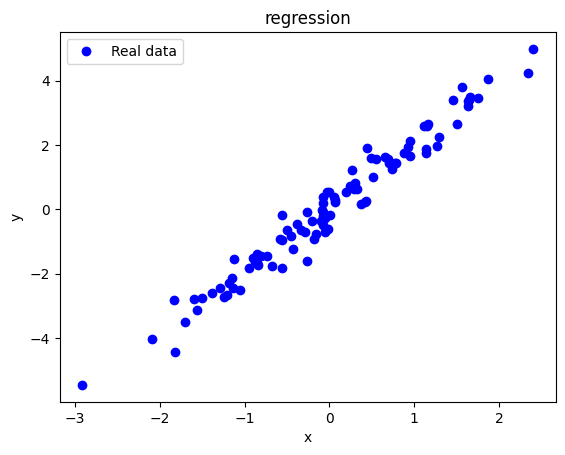

In [ ]:
N = 100
m = 2
x = torch.randn(size=(N,1))
y = m*x + torch.randn(size=(N,1))/3
plt.plot(x,y,'ob')
plt.legend(['Real data'])
plt.title('regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Model

In [ ]:
# build a sequential model

ann_reg = nn.Sequential(
    nn.Linear(1,1), # input layer
    # nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer
)
ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

#### Meta-parameters

In [ ]:
# learning rate
LR = .05
# loss function
lossfun = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(ann_reg.parameters(),lr=LR)

#### training

In [ ]:
numepochs = 500
losses_logs = torch.zeros(numepochs)

for ei in tqdm(range(numepochs)):
  yh = ann_reg(x)

  loss = lossfun(yh,y)
  losses_logs[ei] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


100%|██████████| 500/500 [00:00<00:00, 1178.23it/s]


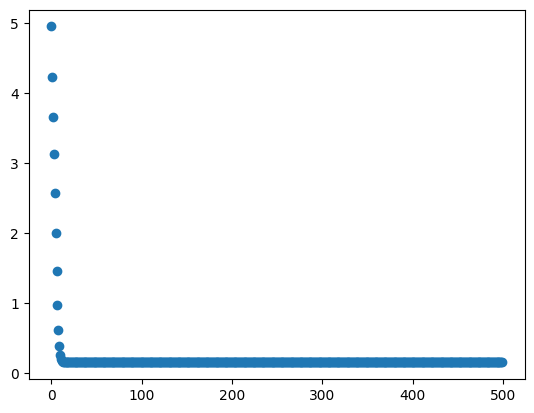

In [ ]:
plt.plot(losses_logs.detach(),'o')
plt.show()

#### test data
-----

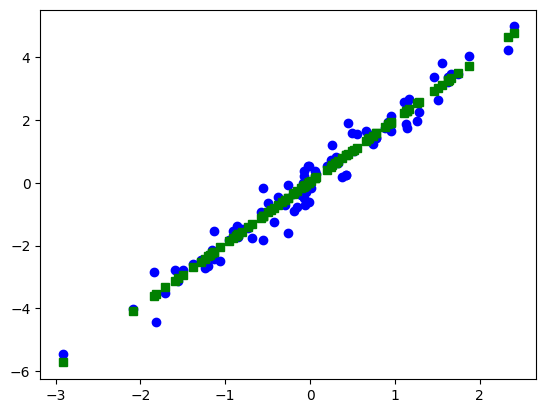

In [ ]:
prediction = ann_reg(x)

plt.plot(x,y,'ob')
plt.plot(x,prediction.detach(),'sg')
plt.show()

In [ ]:
for param in ann_reg.parameters():
  print(param.detach())

tensor([[1.3351]])
tensor([0.0218])
tensor([[1.4820]])
tensor([0.0077])


## train a simple classification model

#### data preprocess

In [ ]:
numClust = 100
blur = 3

A = [1 , 1]
B = [1 , 10]

a = [ A[1] + np.random.randn(numClust)*blur , A[0] + np.random.randn(numClust)*blur]
b = [ B[1] + np.random.randn(numClust)*blur , B[0] + np.random.randn(numClust)*blur]

labels_np = np.vstack((np.zeros((numClust,1)),np.ones((numClust,1))))

data_np = np.hstack((a,b)).T

# transform to pytorch tensor
labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

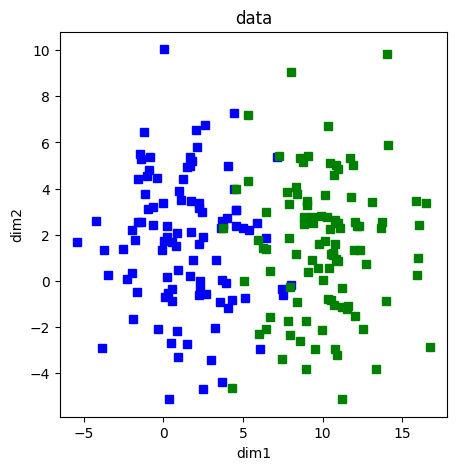

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'gs')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('data')
plt.show()

#### Model

In [ ]:
ann_class = nn.Sequential(
    nn.Linear(2,6,True),
    nn.ReLU(),
    nn.Linear(6,4,True),
    nn.ReLU(),
    nn.Linear(4,1,True),
    nn.ReLU(),
    nn.Linear(1,1,True),
    nn.Sigmoid()
)
ann_class

Sequential(
  (0): Linear(in_features=2, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1, out_features=1, bias=True)
  (7): Sigmoid()
)

In [ ]:
loss_func2 = nn.BCELoss()
# we can also use BCEwithlogitsloss() and remove the last layer (sigmoid) in ann model

In [ ]:
from tqdm import tqdm
numepochs2 = 2_000
lr_l = [0.1,0.01,0.02,0.03,0.04,0.05]
loss_list = []
for i in range(len(lr_l)):
  loss2 = torch.zeros(numepochs2)
  learning_rate2 = lr_l[i]
  optimizer2 = torch.optim.SGD(ann_class.parameters(),lr = learning_rate2)
  for ep in tqdm(range(numepochs2)):
    yh = ann_class(data)

    loss = loss_func2(yh,labels)
    loss2[ep] = loss

    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
  loss_list.append(loss2)

100%|██████████| 2000/2000 [00:02<00:00, 928.20it/s]


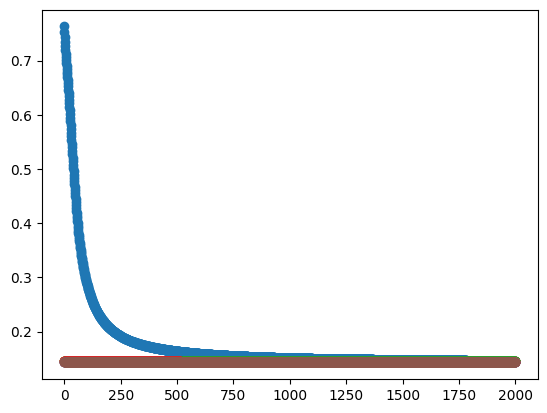

In [ ]:
for i in range(len(lr_l)):
  plt.plot(loss_list[i].detach(),'o')
plt.show()

#### prediction

In [ ]:
# predictions

predicts = ann_class(data)

prediclabels = predicts>.5
# print(prediclabels)

misclassified = np.where(prediclabels != labels)[0]
print(misclassified)

# accuracy
acc = 100-100*len(misclassified)/(2*numClust)
print(acc)

[  0  16  27  68  69  88 111 116 172 174 182 193]
94.0


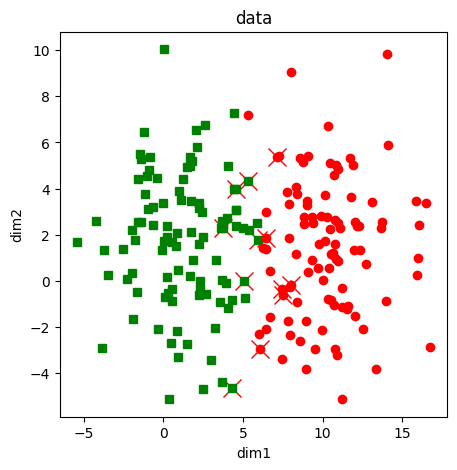

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize='13')
plt.plot(data[(np.where(~prediclabels)[0]),0],data[np.where(~prediclabels)[0],1],'gs')
plt.plot(data[np.where(prediclabels)[0],0],data[np.where(prediclabels)[0],1],'ro')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('data')
plt.show()

## Using pre-trained model

# RL libraries

## Stable-baseline
https://stable-baselines3.readthedocs.io/en/master/

## Open-AI GYM
https://gymnasium.farama.org/

## RLlib
https://docs.ray.io/en/latest/rllib/index.html